# Customer Churn Prediction — Machine Learning Project

This project predicts customer churn for a telecom company using machine learning.
It includes:

- Data cleaning  
- Exploratory Data Analysis (EDA)  
- Handling class imbalance using SMOTE  
- Model training (Logistic Regression, Random Forest, XGBoost)  
- Feature importance  
- Business insights  
- Saving the final model  


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

%matplotlib inline
sns.set(style="whitegrid")

df = pd.read_csv(r"C:\Users\User\customer-churn-prediction\data\WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 1. Data Cleaning

- Inspect dataset  
- Convert TotalCharges to numeric  
- Handle missing values  
- Convert SeniorCitizen to categorical  


In [4]:
df.info()

df["TotalCharges"] = df["TotalCharges"].replace(" ", np.nan)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

df.dropna(subset=["TotalCharges"], inplace=True)
df.reset_index(drop=True, inplace=True)

df["SeniorCitizen"] = df["SeniorCitizen"].astype("object")

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## 2. Exploratory Data Analysis (EDA)

The following visualizations explore churn patterns:
- Churn distribution  
- Tenure vs Churn  
- Monthly Charges vs Churn  
- Contract Type vs Churn  
- Internet Service vs Churn  
- Payment Method vs Churn  


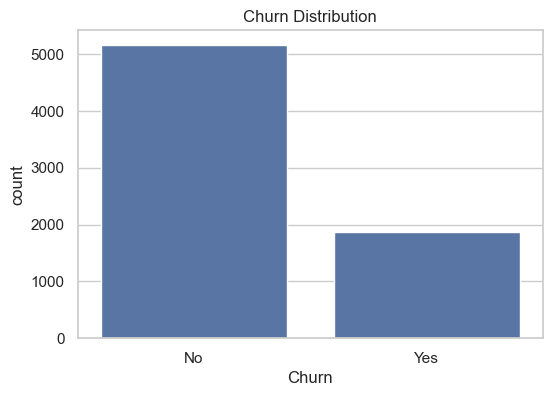

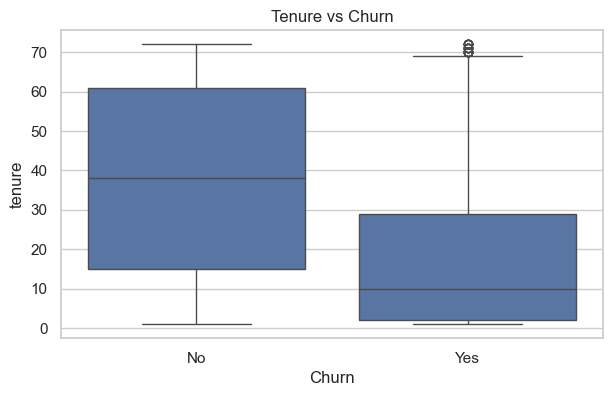

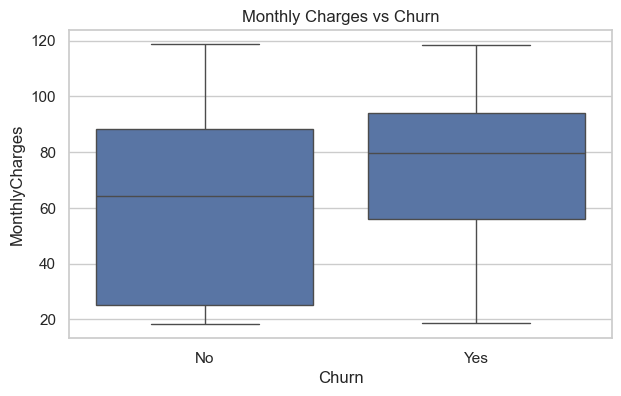

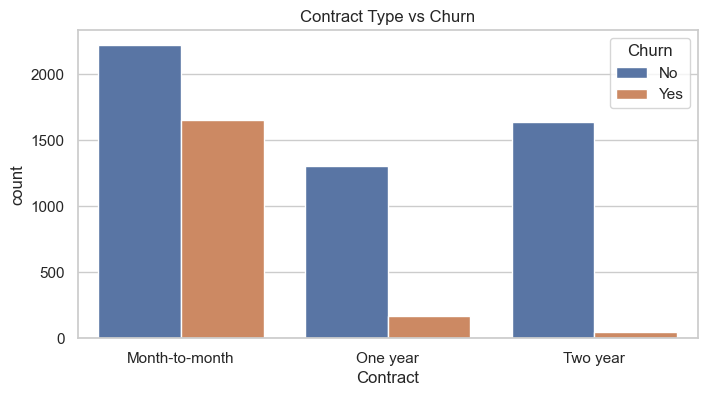

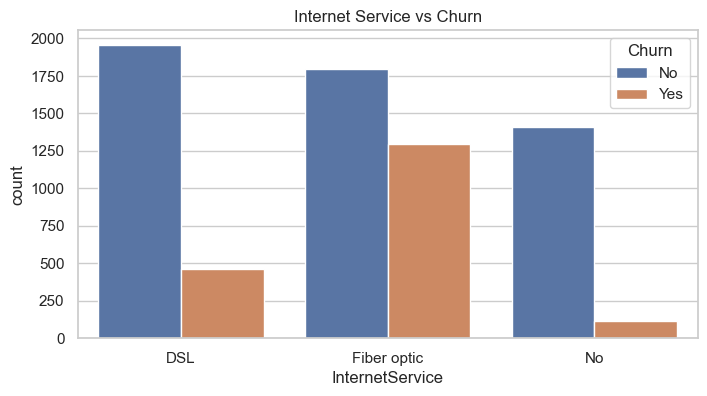

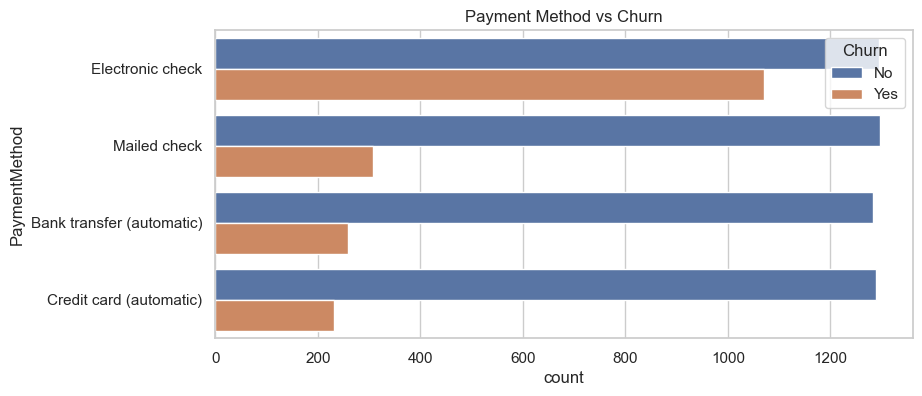

In [6]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Churn')
plt.title("Churn Distribution")
plt.show()

plt.figure(figsize=(7,4))
sns.boxplot(data=df, x='Churn', y='tenure')
plt.title("Tenure vs Churn")
plt.show()

plt.figure(figsize=(7,4))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title("Monthly Charges vs Churn")
plt.show()

plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title("Contract Type vs Churn")
plt.show()

plt.figure(figsize=(8,4))
sns.countplot(data=df, x='InternetService', hue='Churn')
plt.title("Internet Service vs Churn")
plt.show()

plt.figure(figsize=(9,4))
sns.countplot(data=df, y='PaymentMethod', hue='Churn')
plt.title("Payment Method vs Churn")
plt.show()


## 3. Data Preprocessing for Modeling


In [8]:
df_model = df.drop(columns=["customerID"])
df_model["Churn"] = df_model["Churn"].map({"No":0, "Yes":1})

df_encoded = pd.get_dummies(df_model, drop_first=True)

X = df_encoded.drop("Churn", axis=1)
y = df_encoded["Churn"]


## 4. Model Performance Before SMOTE (Imbalanced Data)

Before applying SMOTE, the dataset is highly imbalanced.  
This baseline model helps us compare performance before vs. after balancing.

We train a simple Logistic Regression model on the imbalanced dataset and evaluate how well it predicts churn.


In [10]:
# Train-test split BEFORE SMOTE (imbalanced)
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Logistic Regression BEFORE SMOTE
log_orig = LogisticRegression(max_iter=2000)
log_orig.fit(X_train_orig, y_train_orig)

y_pred_orig = log_orig.predict(X_test_orig)

print("Accuracy (Before SMOTE):", accuracy_score(y_test_orig, y_pred_orig))
print(classification_report(y_test_orig, y_pred_orig))


Accuracy (Before SMOTE): 0.8031272210376688
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Confusion Matrix (Before SMOTE)

This shows how poorly the model predicts the minority class (churn).  
We expect low recall for churn here.


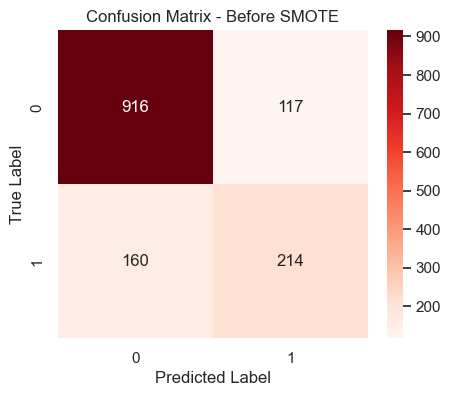

In [12]:
# Confusion Matrix BEFORE SMOTE
cm_before = confusion_matrix(y_test_orig, y_pred_orig)

plt.figure(figsize=(5,4))
sns.heatmap(cm_before, annot=True, fmt='d', cmap='Reds')
plt.title("Confusion Matrix - Before SMOTE")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


## 5. Handling Class Imbalance Using SMOTE


In [14]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

y.value_counts(), y_res.value_counts()


(Churn
 0    5163
 1    1869
 Name: count, dtype: int64,
 Churn
 0    5163
 1    5163
 Name: count, dtype: int64)

## 6. Train-Test Split


In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42, stratify=y_res
)


## 7. Logistic Regression (Balanced)


In [18]:
log = LogisticRegression(max_iter=2000)
log.fit(X_train, y_train)
y_pred_log = log.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


Accuracy: 0.829622458857696
              precision    recall  f1-score   support

           0       0.84      0.81      0.83      1033
           1       0.82      0.85      0.83      1033

    accuracy                           0.83      2066
   macro avg       0.83      0.83      0.83      2066
weighted avg       0.83      0.83      0.83      2066



C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 8. XGBoost (Final Model)


In [20]:
xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss'
)

xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


C:\Users\User\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:00:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.8339787028073572
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1033
           1       0.83      0.85      0.84      1033

    accuracy                           0.83      2066
   macro avg       0.83      0.83      0.83      2066
weighted avg       0.83      0.83      0.83      2066



## 9. Confusion Matrix (XGBoost)

The confusion matrix helps visualize how well the model distinguishes between churn and non-churn customers.


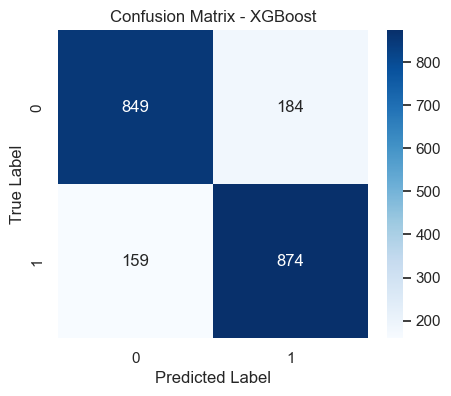

In [22]:
cm = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - XGBoost")
plt.show()


## 10. Performance Comparison: Before vs After SMOTE

Balancing the dataset using SMOTE significantly improved the model’s ability to detect churn (the minority class).

### 🔍 Key Observations
- Before SMOTE, the model was biased toward predicting "No Churn".
- Churn recall (ability to detect churners) was very low before balancing.
- After SMOTE, the model achieved **much higher recall** and became more useful for identifying churn.

### 📊 Summary Table (Generated Below)
The table compares:
- Accuracy
- Churn Recall (Class 1)

This clearly shows how SMOTE improves model performance.


In [24]:
# Calculate recall for churn (class 1) before and after SMOTE
before_recall = classification_report(y_test_orig, y_pred_orig, output_dict=True)["1"]["recall"]
after_recall = classification_report(y_test, y_pred_xgb, output_dict=True)["1"]["recall"]

# Build comparison table
comparison_df = pd.DataFrame({
    "Model Version": ["Before SMOTE", "After SMOTE"],
    "Accuracy": [
        accuracy_score(y_test_orig, y_pred_orig),
        accuracy_score(y_test, y_pred_xgb)
    ],
    "Churn Recall (Class 1)": [
        before_recall,
        after_recall
    ]
})
comparison_df["Accuracy"] = comparison_df["Accuracy"].round(3)
comparison_df["Churn Recall (Class 1)"] = comparison_df["Churn Recall (Class 1)"].round(3)
comparison_df


,Model Version,Accuracy,Churn Recall (Class 1)
0,Before SMOTE,0.803,0.572
1,After SMOTE,0.834,0.846


## 11. Feature Importance


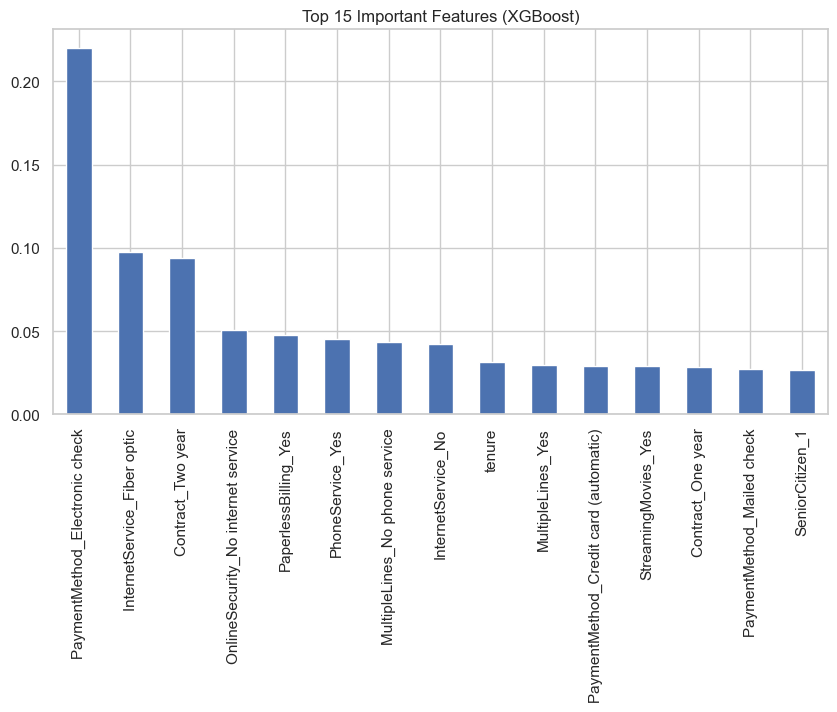

In [26]:
importance = pd.Series(xgb.feature_importances_, index=X.columns)
importance.nlargest(15).plot(kind='bar', figsize=(10,5))
plt.title("Top 15 Important Features (XGBoost)")
plt.show()


## 12. Business Insights

- Month-to-month contracts have the highest churn  
- High monthly charges increase churn risk  
- Low-tenure customers churn early  
- Fiber optic users churn more  
- Electronic check payment method correlates with churn  


## 13. Saving the Final Model

We save the trained XGBoost model and the feature list so the model can be loaded later for prediction.


In [29]:
import os, joblib

os.makedirs("models", exist_ok=True)
joblib.dump(xgb, "models/xgb_churn_model.pkl")
joblib.dump(list(X.columns), "models/model_features.pkl")


['models/model_features.pkl']